In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('light_curves_181646914411688960_200261994165010176.csv')

In [5]:
df.head()

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,181646914411688960,17390384531924047,G,1711.339752,15.674099,10132.264128,64.670419,156.67540,False,True,4101,369295549951641967
1,181646914411688960,19240383064740421,G,1744.799194,15.713665,9769.679686,18.609422,524.98566,False,False,1,369295549951641967
2,181646914411688960,19250123867579313,G,1744.975366,15.703185,9864.433111,14.214431,693.97314,False,False,1,369295549951641967
3,181646914411688960,26786862375244063,G,1881.271776,15.706703,9832.526462,31.084255,316.31854,False,False,4097,369295549951641967
4,181646914411688960,28490402782028622,G,1912.076405,15.698724,9905.046149,13.649018,725.69660,False,False,1,369295549951641967


In [7]:
df.groupby(['source_id', 'time'])['flux_over_error'].first()

source_id           time       
181646914411688960  1711.339752    156.675400
                    1711.340066     50.274986
                    1711.340155     85.977530
                    1744.799194    524.985660
                    1744.799509     62.459710
                                      ...    
200261994165010176  2305.304291    138.551200
                    2305.304376    361.620670
                    2305.377980     70.982050
                    2305.378294    154.087330
                    2305.378379    463.599800
Name: flux_over_error, Length: 86458, dtype: float64

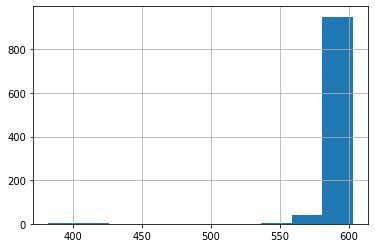

In [9]:
df.groupby('source_id')['time'].apply(lambda x: x.max() - x.min()).hist()

Max diff follows poisson distribution

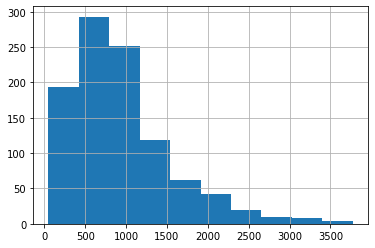

In [10]:
df.groupby('source_id')['flux_over_error'].apply(lambda x: x.max() - x.min()).hist()

In [11]:
df['other_flags'].value_counts()

0          55450
1          16715
4097        6458
4194817     2992
4198913     1057
           ...  
2101257        1
1056768        1
69639          1
3313665        1
4198941        1
Name: other_flags, Length: 399, dtype: int64

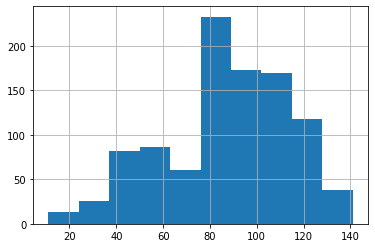

In [13]:
df['source_id'].value_counts().hist()

In [15]:
df['band'].value_counts()

G     31076
BP    27923
RP    27527
Name: band, dtype: int64

In [24]:
df['source_id'].value_counts().head()

184854434646126080    141
187839539996486272    140
188743269835075456    138
188733271151219584    136
187838814144889600    135
Name: source_id, dtype: int64

0

In [25]:
src = df.loc[df['source_id'] == 184854434646126080]

In [26]:
src

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
9032,184854434646126080,17380585512157341,G,1711.162418,14.791303,22846.784826,24.928159,916.50510,False,False,4194817,369295549951641967
9033,184854434646126080,19240322461372875,G,1744.798038,14.783311,23015.577922,124.460920,184.92212,False,True,36897,369295549951641967
9034,184854434646126080,19250063268012628,G,1744.974189,14.792147,22829.031799,24.507929,931.49570,False,False,1,369295549951641967
9035,184854434646126080,26800715513226456,G,1881.522349,14.789563,22883.425327,28.732264,796.43650,False,False,1,369295549951641967
9036,184854434646126080,26804807812039491,G,1881.596321,14.790292,22868.068041,25.869211,883.98785,False,False,4194817,369295549951641967
...,...,...,...,...,...,...,...,...,...,...,...,...
9168,184854434646126080,49602034741339239,RP,2293.868546,14.119464,18071.000560,132.476779,136.40881,False,False,0,369295549951641967
9169,184854434646126080,50220327324508331,RP,2305.049198,14.121147,18043.024200,131.803276,136.89360,False,False,0,369295549951641967
9170,184854434646126080,50224419572217629,RP,2305.123199,14.111009,18212.278961,137.405790,132.54375,False,False,0,369295549951641967
9171,184854434646126080,50234160359290702,RP,2305.299342,14.116655,18117.819594,137.591944,131.67792,False,False,0,369295549951641967
